## Clasificador Softmax

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

#!pip install torchvision==0.9.1 torch==1.8.1
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

Utiliza la siguiente **función** para **graficar los parámetros de la función Softmax**:


In [2]:
# The function to plot parameters

def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:

            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

Utiliza la siguiente función para visualizar los datos

In [3]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

## Make Some Data

Cargar el **conjunto de datos de entrenamiento** estableciendo el parámetro **`train`** en **`True`** y convertirlo en un **tensor** colocando un objeto **`transform`** en el argumento **`transform`**.


In [4]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


Cargar el **conjunto de datos de prueba** y convertirlo en un **tensor** colocando un objeto **`transform`** en el argumento **`transform`**.


In [5]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
# Print the type of the element

print("Type of data element: ", type(train_dataset[0][1]))

Type of data element:  <class 'int'>


Cada elemento del **tensor rectangular** corresponde a un número que representa la **intensidad de un píxel**, como se muestra en la siguiente imagen:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements">

En esta imagen, los valores están **invertidos**, es decir, **el fondo representa el color blanco**.


Imprime la **etiqueta del cuarto elemento**:


In [7]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  1


El resultado dice que la imagen es 1

Graficar la **cuarta muestra**:


In [8]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  1


Es 1. Ahora a la tercer muestra

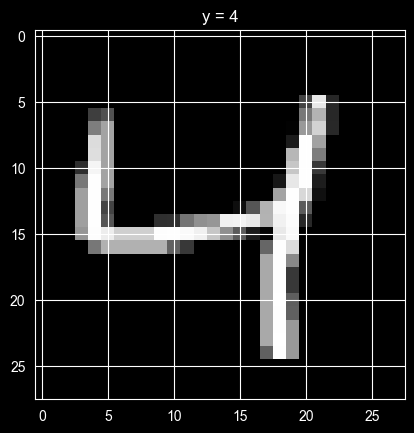

In [9]:
# Plot the image

show_data(train_dataset[2])

## Construye un clasificador Softmax

Constuye una clase

In [10]:
# Define softmax classifier class

class SoftMax(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

La función **Softmax** requiere **entradas vectoriales**. Observa que la forma del vector es **28 × 28**.


In [11]:
# Print the shape of train dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

Aplana (*flatten*) el **tensor** como se muestra en esta imagen:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2image_to_vector.gif" width="550" alt="Flattern Image">

El tamaño del tensor ahora es 786

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2Imagetovector2.png" width="550" alt="Flattern Image">

Establece el tamaño de la entrada y el tamaño de la salida:

In [12]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

## Define el clasificador Softmax, la función criterio, el optimizador y entrena el modelo

In [13]:
# Create the model

model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


Visualiza el tamaño de los parametros del modelo

In [14]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


Puedes organizar los parámetros del modelo de cada clase en una cuadrícula rectangular:


<a>     <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2paramaters_to_image.gif" width="550," align="center"></a>

Grafica los parámetros del modelo de cada clase como una imagen cuadrada

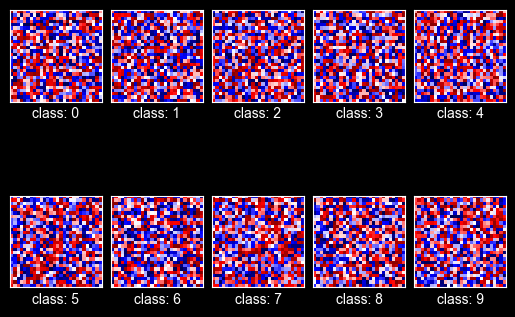

In [15]:
# Plot the model parameters for each class

PlotParameters(model)

Define la tasa de aprendizaje, el optimizador, el criterio y el cargador de datos


In [16]:
# Define the learning rate, optimizer, criterion and data loader

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

Entrena el modelo y determina la exactitud en validación (debería tomar unos minutos):

In [17]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()

        correct = 0
        # perform a prediction on the validationdata
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

### Resultado de analísis

Grafica la pérdida y la exactitud en los datos de validación:

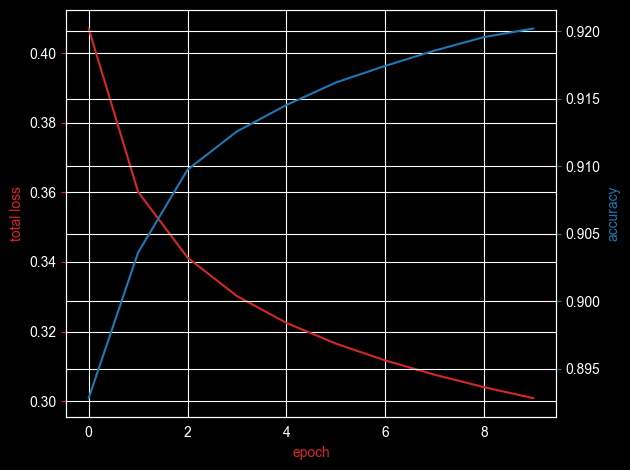

In [18]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Visualiza los resultados de los parámetros para cada clase después del entrenamiento. Puedes ver que se parecen a los números correspondientes.

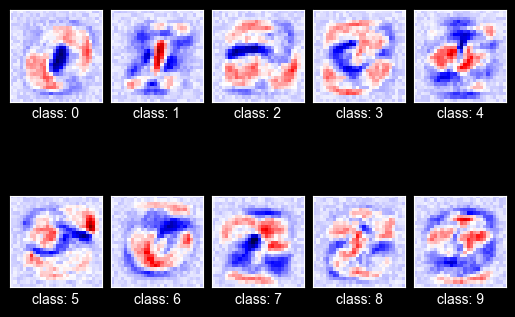

In [19]:
# Plot the parameters

PlotParameters(model)

Graficamos las primeras cinco muestras clasificadas incorrectamente y la probabilidad de esa clase.

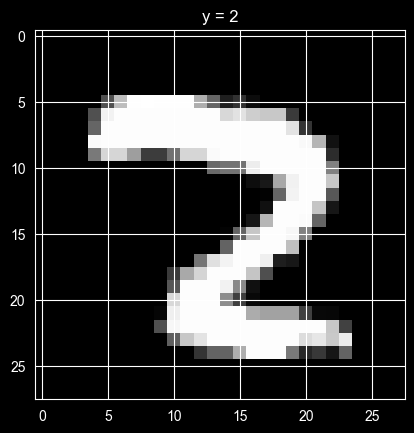

yhat: tensor([7])
probability of class  0.7068808674812317


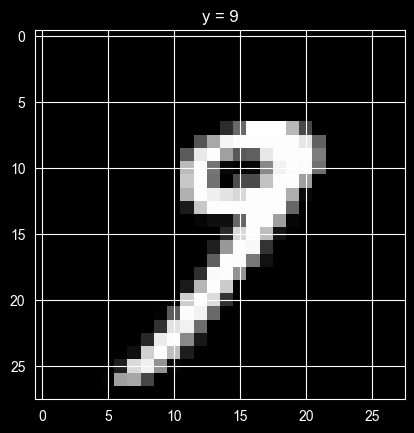

yhat: tensor([7])
probability of class  0.7107232213020325


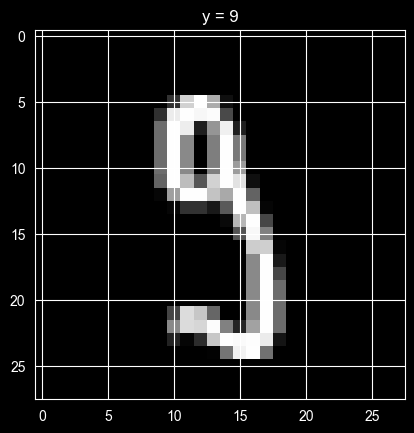

yhat: tensor([5])
probability of class  0.728638231754303


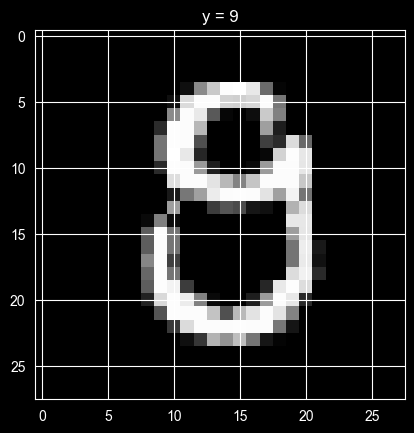

yhat: tensor([8])
probability of class  0.3708893656730652


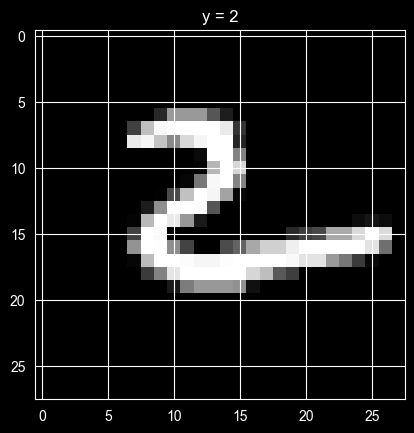

yhat: tensor([6])
probability of class  0.5093883275985718


In [20]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

Graficamos las primeras cinco muestras clasificadas correctamente y la probabilidad de esa clase; podemos ver que la probabilidad es mucho mayor.

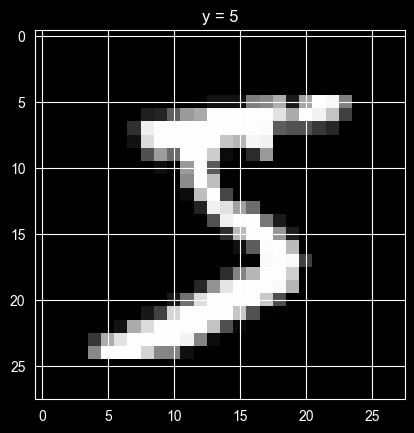

yhat: tensor([5])
probability of class  0.8421525955200195


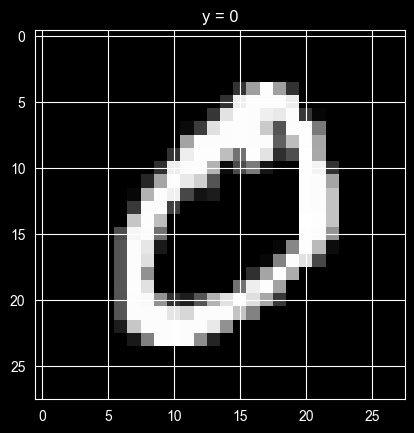

yhat: tensor([0])
probability of class  0.9997054934501648


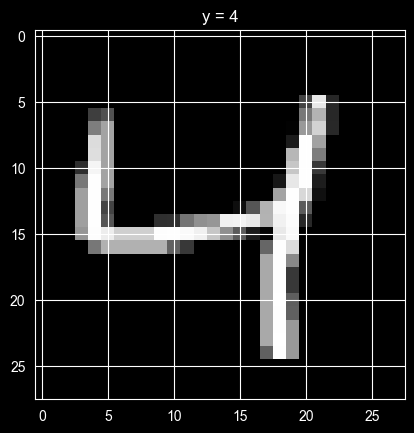

yhat: tensor([4])
probability of class  0.8731262683868408


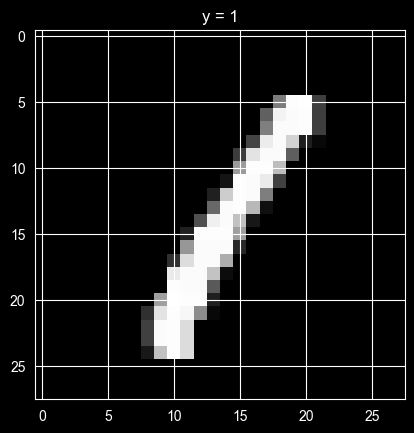

yhat: tensor([1])
probability of class  0.9665891528129578


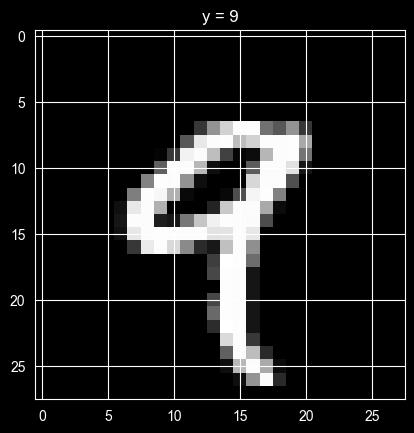

yhat: tensor([9])
probability of class  0.9229969382286072


In [21]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break